# Graded Challenge 4 Phase 1

## 1. Introduction

Name            : Franciscus Andrew Sunanda

Batch           : FTDS-RMT-018

Dataset         : Credit Card Information (from Google Cloud)

Objective       : Dapat membuat model clustering untuk tipe tipe user credit card

## 2. SQL Query

Berikut ini adalah Query SQL yang saya pada platform Google Cloud untuk mengambil dataset

```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information`
WHERE mod(CUST_ID,2) = 0
```

## 3. Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pickle
import json

## 4. Data Loading

In [28]:
df = pd.read_csv('h8dsft_P1G4_andrewsunanda.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [29]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Berikut ini adalah informasi dari setiap column dalam data set ini

Header | Definition | Keys
---|---|---
`CUST_ID` | Identification of Credit Card holder |
`BALANCE` | Balance amount left in their account | 
`BALANCE_FREQUENCY` | How frequently the Balance is updated | 0 = not frequently updated, 1 = frequently updated
`PURCHASES` | Amount of purchases made from account | 
`ONEOFF_PURCHASES` | Maximum purchase amount done in one-go |
`INSTALLMENTS_PURCHASES` | Amount of purchases done in installment |
`CASH_ADVANCE` | Cash in advance given by the user |
`PURCHASES_FREQUENCY` | How frequently the purchases are being made | 0 = not frequently purchased, 1 = frequently purchased
`ONEOFF_PURCHASES_FREQUENCY` | How frequently purchases are happening in one-go | 0 = not frequently purchased, 1 = frequently purchased
`PURCHASES_INSTALLMENTS_FREQUENCY` | How frequently purchases in installments are being done | 0 = not frequently, 1 = frequently
`CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid | 0 = not frequently, 1 = frequently
`CASH_ADVANCE_TRX` | Number of purchase transactions made |
`PURCHASE_TRX` | Number of transactions made with Cash In Advance |
`CREDIT_LIMIT` | Limit of Credit Card for user | 
`PAYMENTS` | Amount of Payment done by user |
`MINIMUM_PAYMENTS` | Minimum amount of payments paid by user |
`PRC_FULL_PAYMENT` | Percent of full payment paid by user |
`TENURE` | Tenure of credit card service for user

## 5. Exploratory Data Analysis (EDA)

### Cek Missing Value dan Duplicated Data

In [31]:
# Copy DF ke variabel baru
data = df.copy()

In [32]:
# Cek Duplicated Data
data.duplicated().value_counts()

False    4475
dtype: int64

In [33]:
# Cek Missing Value
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [34]:
# Cek Missing Value di Column MINIMUM PAYMENTS
data[data.MINIMUM_PAYMENTS.isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.0,NaN,0.0,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.0,NaN,0.0,8
6,4360,2730.843802,1.000000,2900.00,2900.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2900.0,0.0,NaN,0.0,8
8,5884,18.885677,0.375000,57.00,57.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.0,NaN,0.0,8
27,1830,0.000000,0.000000,66.75,0.00,66.75,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,7492,2242.311686,1.000000,437.00,97.00,340.00,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
4087,4290,1948.434315,1.000000,324.30,324.30,0.00,1468.083560,0.166667,0.166667,0.000000,0.166667,4,4,5000.0,0.0,NaN,0.0,12
4091,5468,4618.091584,1.000000,541.68,541.68,0.00,3580.753362,0.166667,0.166667,0.000000,0.166667,2,2,8500.0,0.0,NaN,0.0,12
4144,4234,27.716642,0.100000,0.00,0.00,0.00,480.104401,0.000000,0.000000,0.000000,0.100000,1,0,5000.0,0.0,NaN,0.0,10


Kelihatan nya yang missing disebabkan column payments nya yang juga 0.0 dimana berarti belum melakukan pembayaran, sehingga seharusnya minimum payment juga 0.0. Mari kita double check dulu apakah semua nya seperti itu

In [35]:
print(data[(data.MINIMUM_PAYMENTS.isnull()) & (data.PAYMENTS != 0)].shape[0])
data[(data.MINIMUM_PAYMENTS.isnull()) & (data.PAYMENTS != 0)]

32


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
32,2068,0.401279,0.090909,31.50,0.00,31.50,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,3000.0,120.697352,NaN,0.0,12
193,4890,0.019680,0.090909,188.02,0.00,188.02,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,7500.0,129.791835,NaN,0.0,12
334,5254,0.000000,0.000000,123.10,0.00,123.10,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,4000.0,101.639354,NaN,0.0,12
350,6686,0.000000,0.000000,228.59,0.00,228.59,0.000000,0.750000,0.000000,0.750000,0.000000,0,16,4000.0,545.756332,NaN,0.0,12
492,1034,0.000000,0.000000,147.00,0.00,147.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,152.109132,NaN,0.0,12
550,1674,0.000000,0.000000,136.80,0.00,136.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2700.0,127.996550,NaN,0.0,12
582,2044,0.000000,0.000000,247.44,0.00,247.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,317.354396,NaN,0.0,12
583,2050,1.600479,0.181818,513.24,0.00,513.24,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,363.735397,NaN,0.0,12
890,5510,7.314379,0.272727,448.74,0.00,448.74,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,3500.0,556.071033,NaN,0.0,12
1048,7350,0.000000,0.000000,232.20,0.00,232.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,415.603589,NaN,0.0,12


Ternyata masih ada 32 data yang payments nya tidak sama dengan 0, namun minimum payment nya juga missing value. Karena saya tidak menemukan pattern mengapa data nya missing akan saya drop saja bersama dengan 1 data yang missing di column credit limit nya

In [36]:
# Ganti value Missing Value jadi 0.0 untuk data yang payment = 0
data.loc[(data.MINIMUM_PAYMENTS.isnull()) & (data.PAYMENTS == 0), 'MINIMUM_PAYMENTS'] = 0.0

# Drop Data Missing Value di column Limit Credit
data.drop(data[(data.CREDIT_LIMIT.isnull())].index, inplace=True)

# Drop Data Missing Value di column Minimum Payment
data.drop(data[(data.MINIMUM_PAYMENTS.isnull()) & (data.PAYMENTS != 0)].index, inplace=True)

# Cek Missing Value
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Heat Map Correlation

<AxesSubplot: >

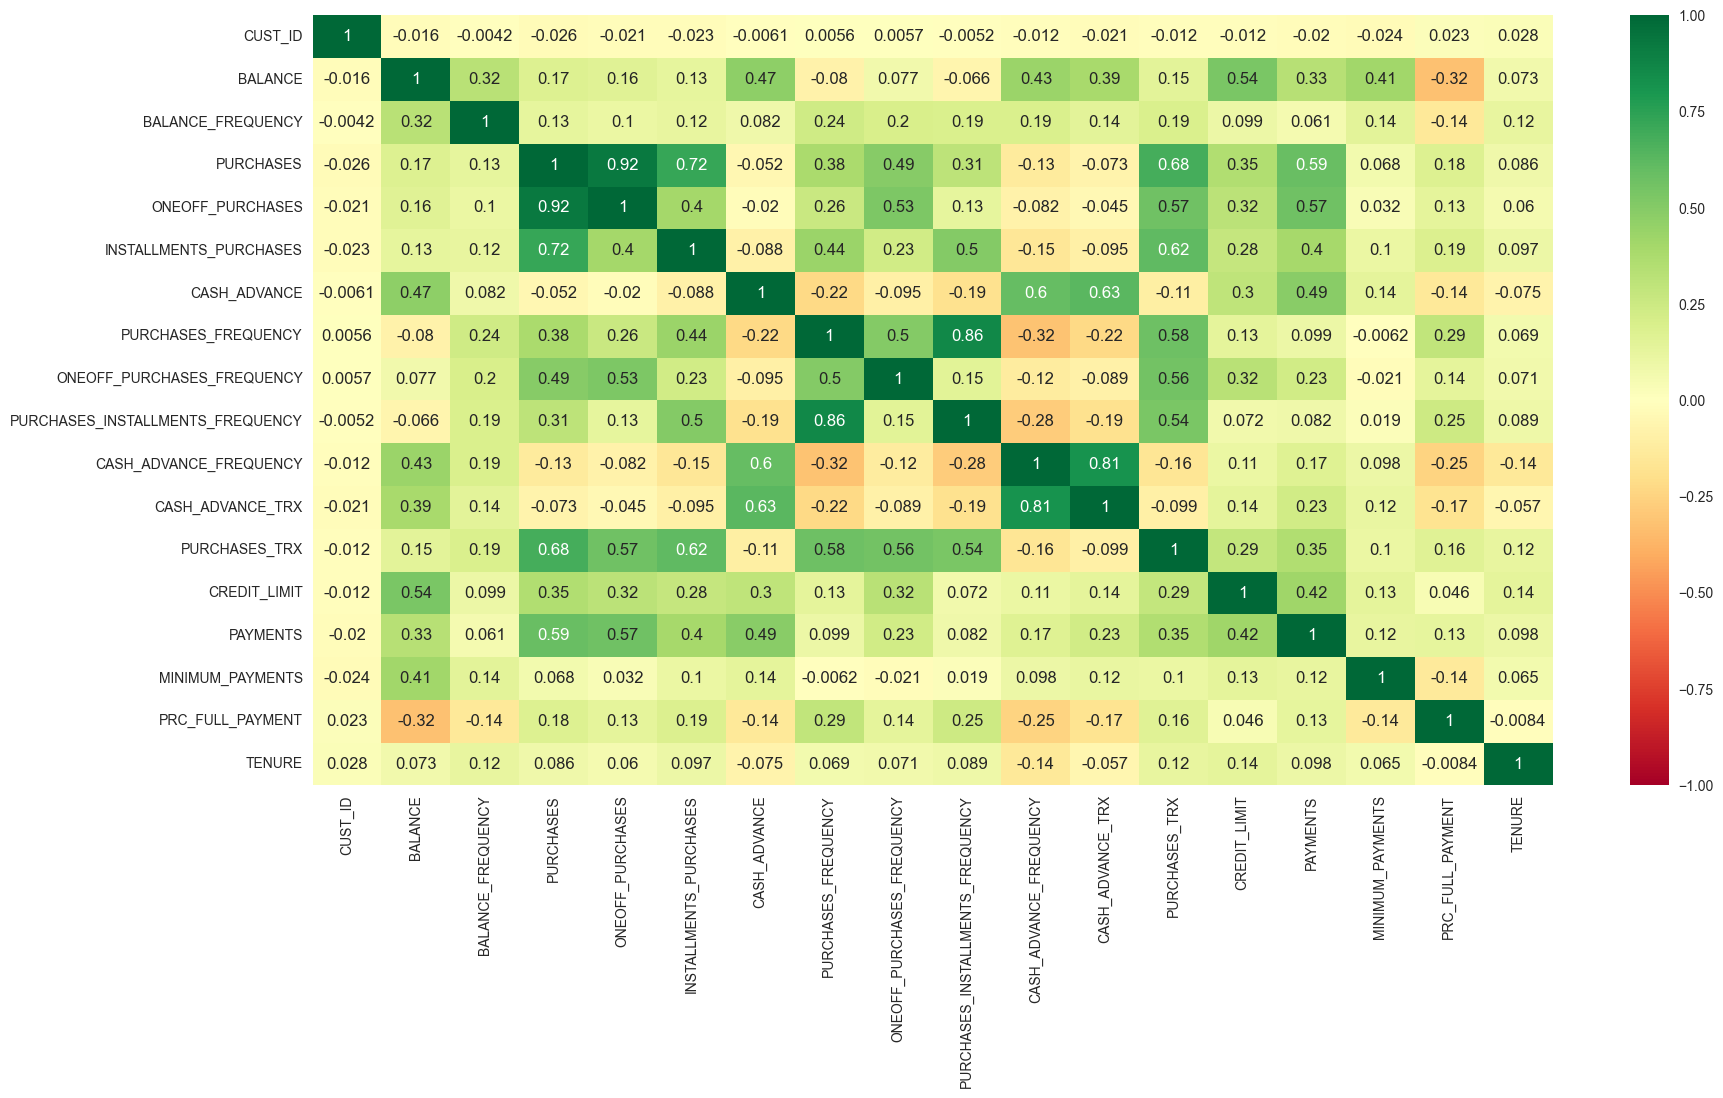

In [37]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdYlGn', annot=True, vmin=-1,vmax=1)

Kelihatannya beberapa feature saling berkaitan satu dengan yang lain dengan cukup signifikan, paling deature yang tidak begitu berkaitan dengan yang lain adalah Customer ID dan juag Tenure

### Distribusi Data

array([[<AxesSubplot: title={'center': 'CUST_ID'}>,
        <AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>],
       [<AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>,
        <AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_TRX'}>,
        <AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>],
       [<AxesSubplot: 

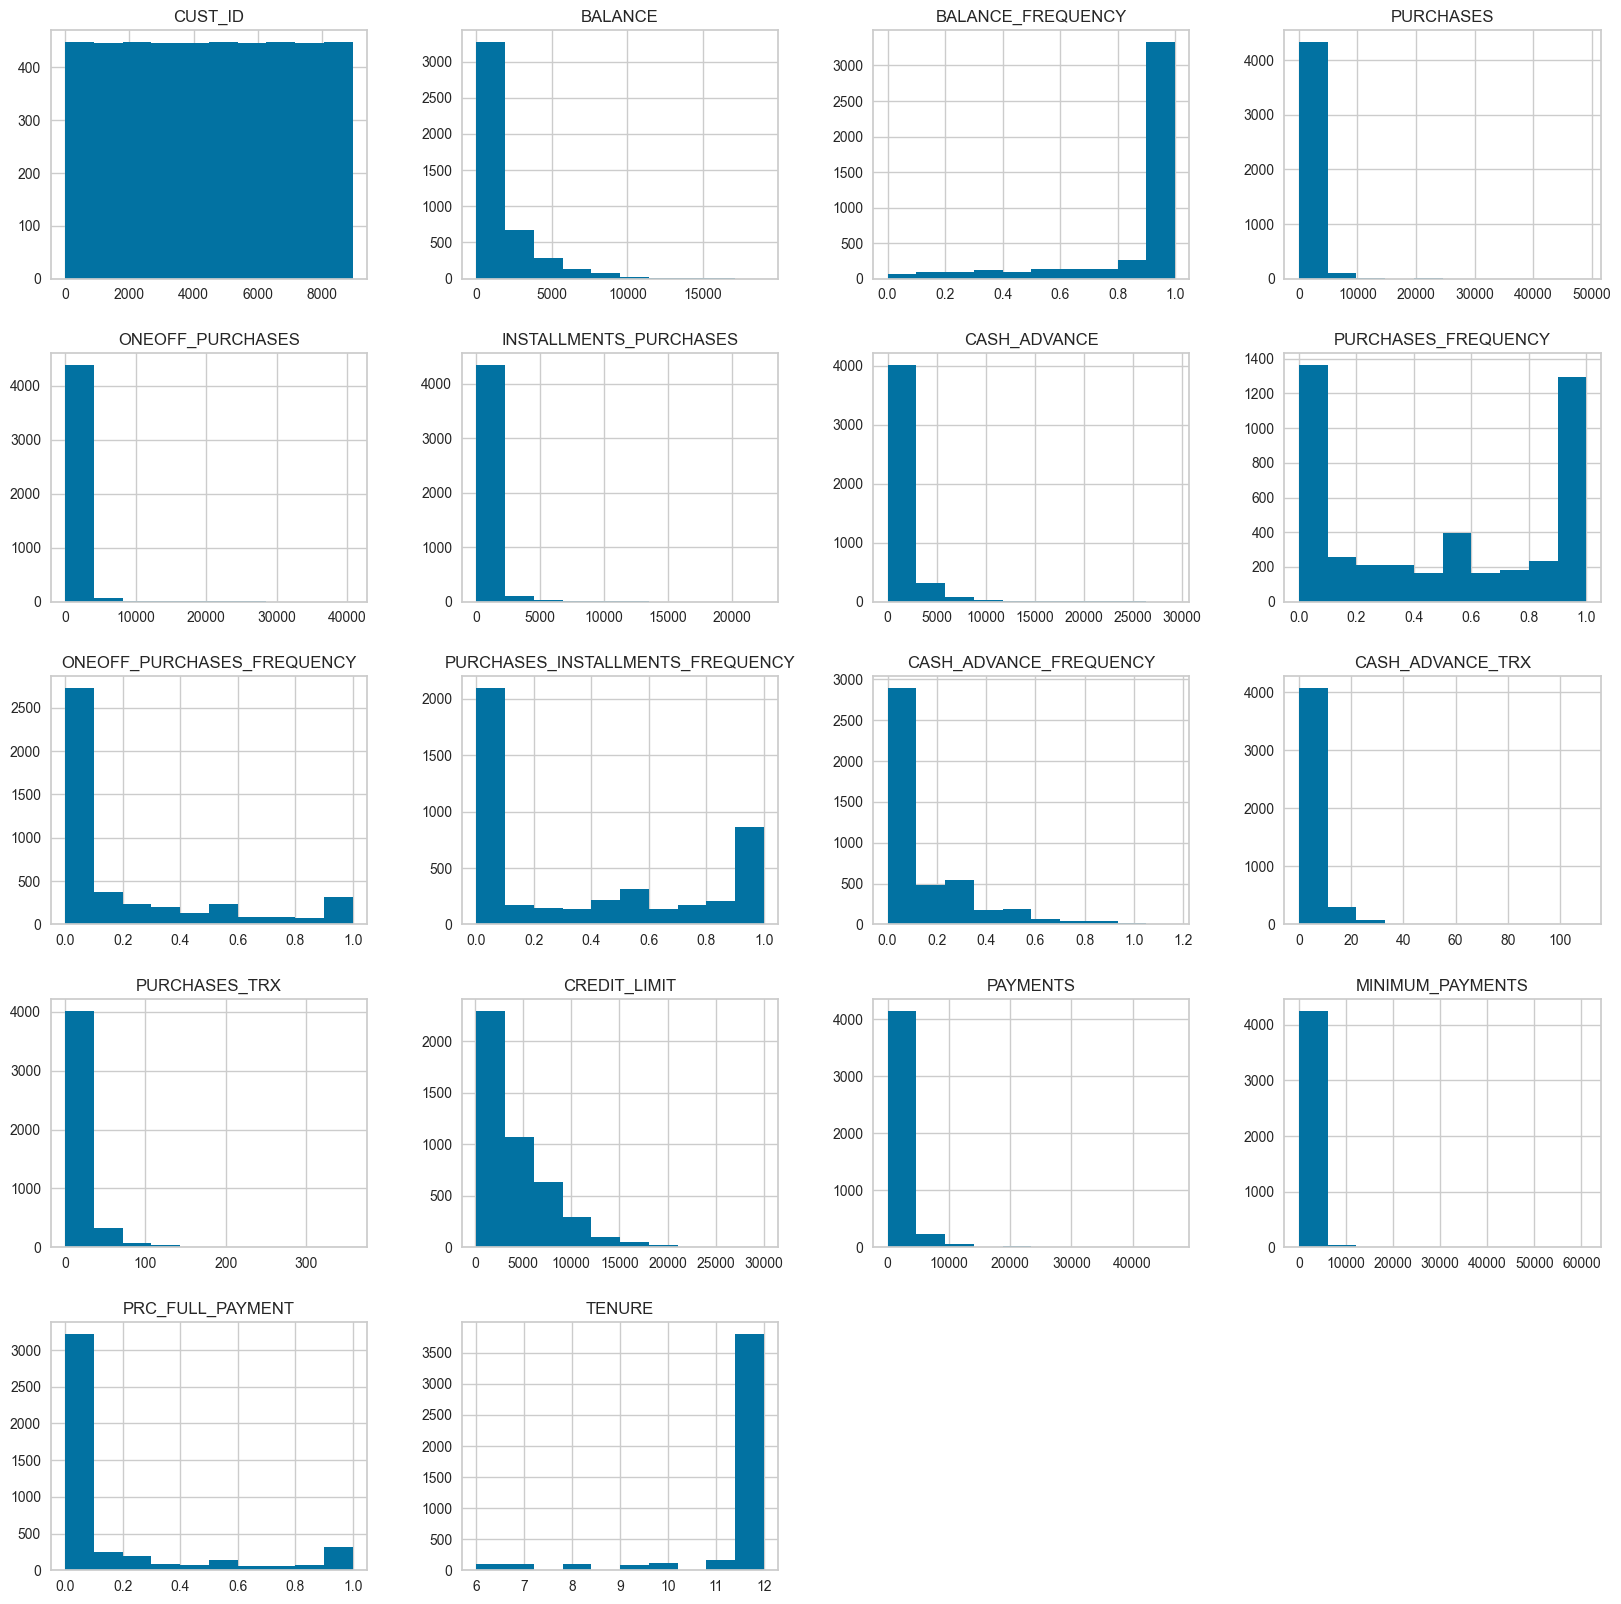

In [38]:
# Melihat persebaran data cash advance frequency
df.hist(figsize = (20,20))

Distribusi Data nya tidak normal untuk semua features

## 6. Feature Engineering

### Features Selection

Saya akan memakai semua features, kecuali Customer ID karena menurut saya column tersebut hanyua merupakan identitas dan tidak akan mempengaruhi cluster customer

In [39]:
feature = data.drop(['CUST_ID'], axis=1)

### Handling Missing Value and Outlier

In [40]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

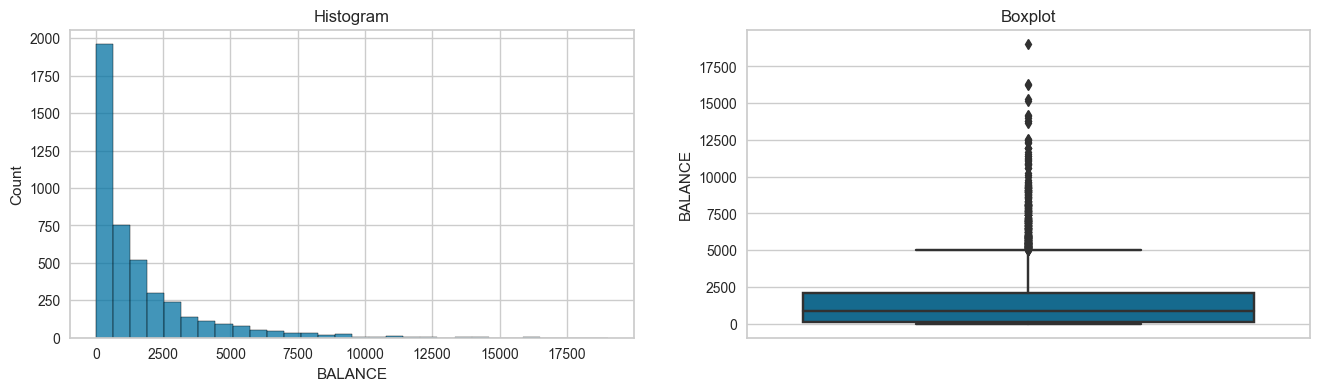

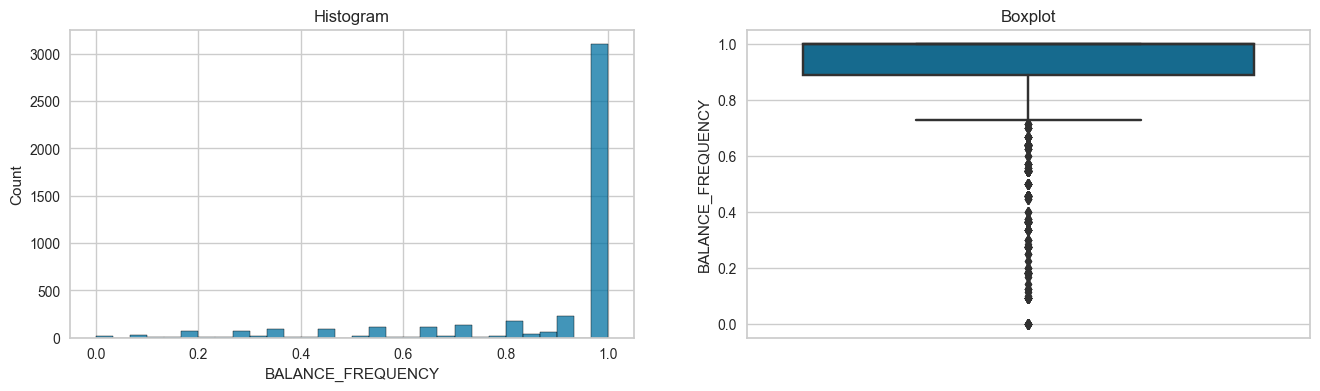

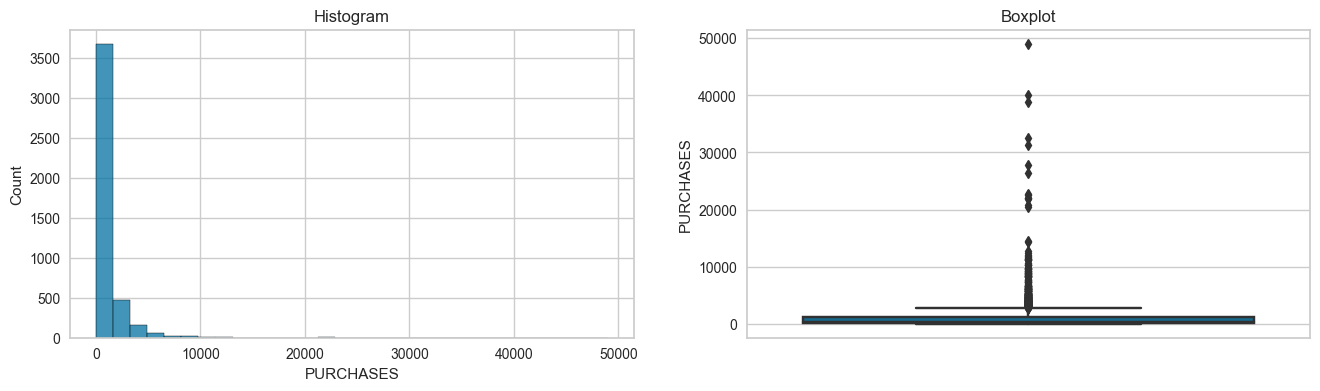

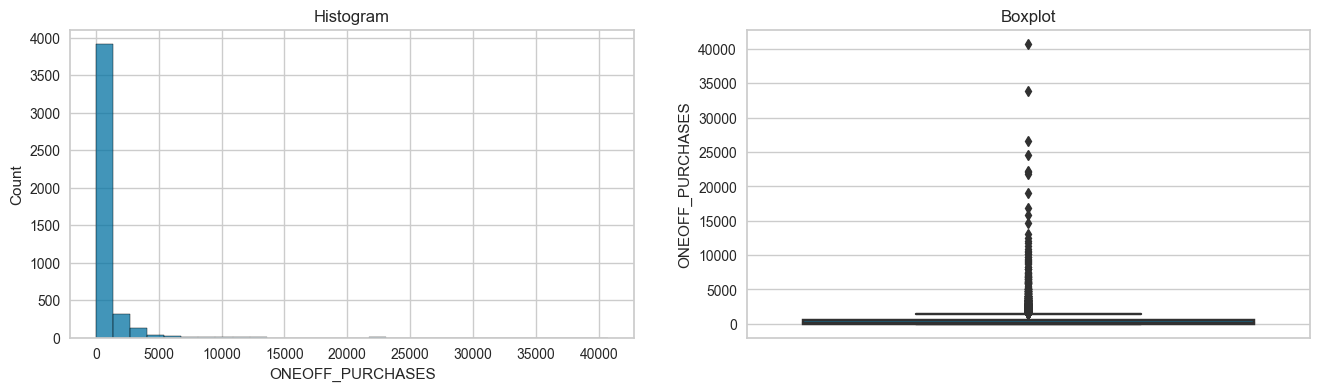

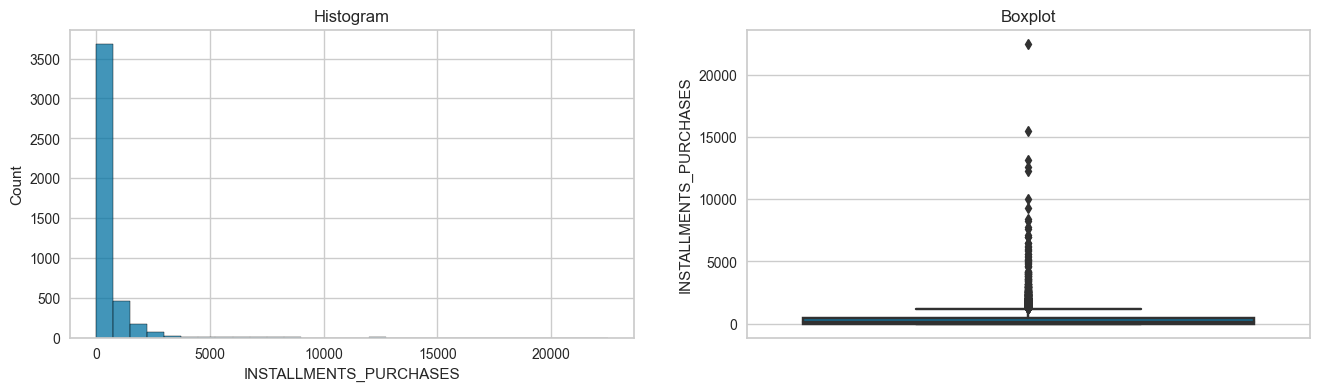

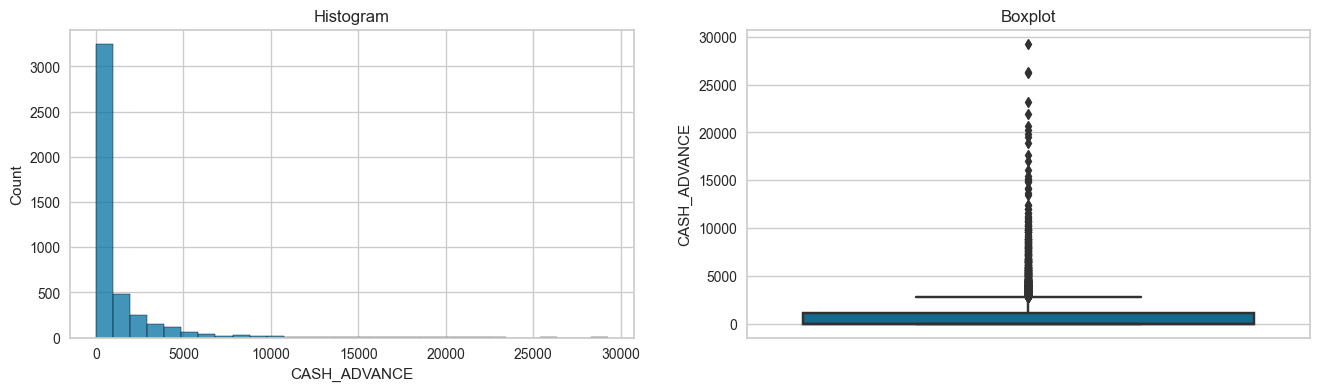

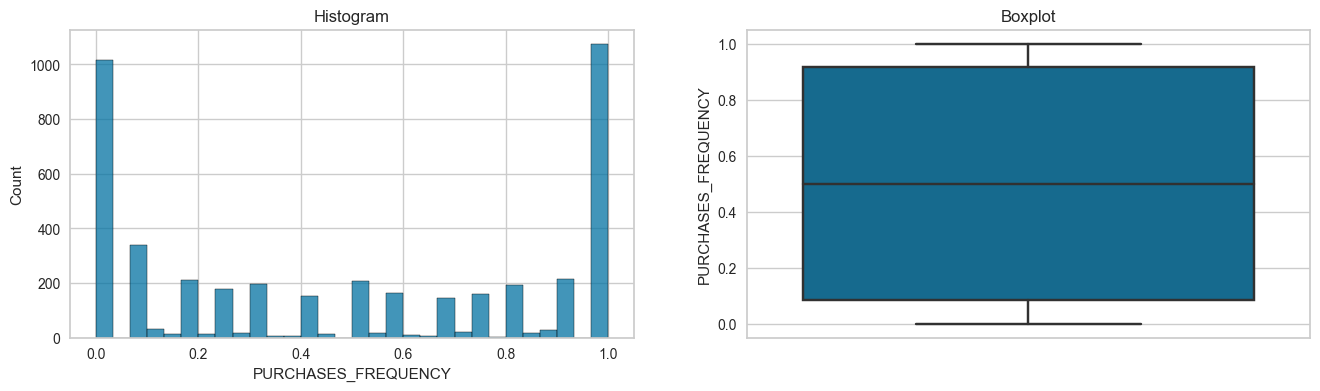

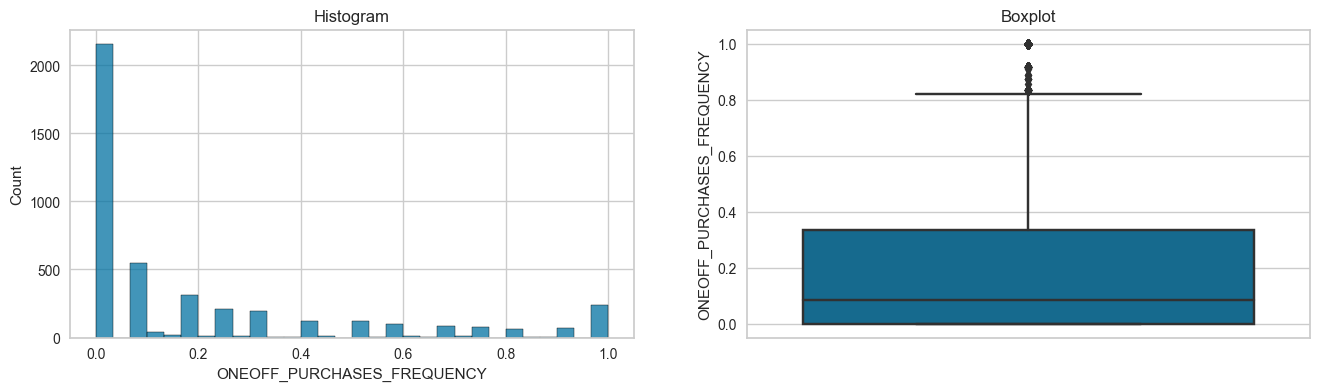

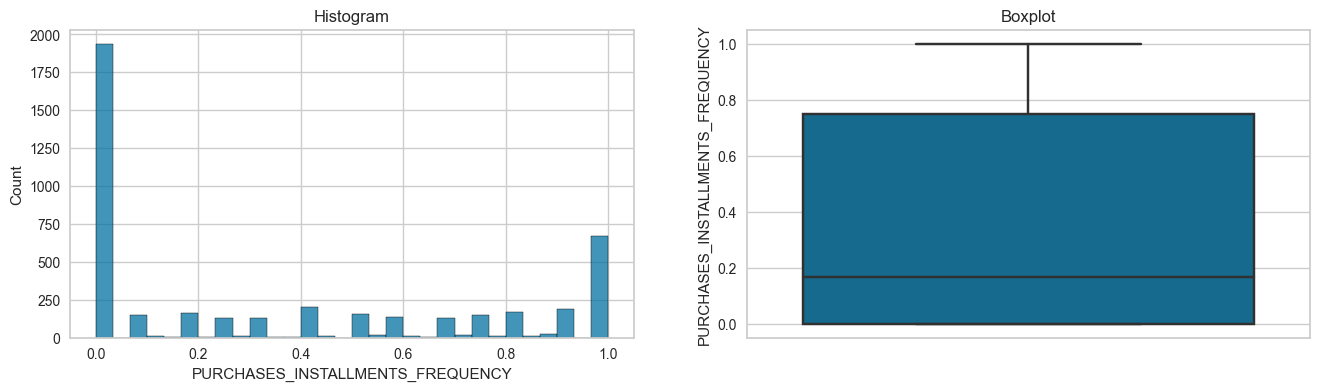

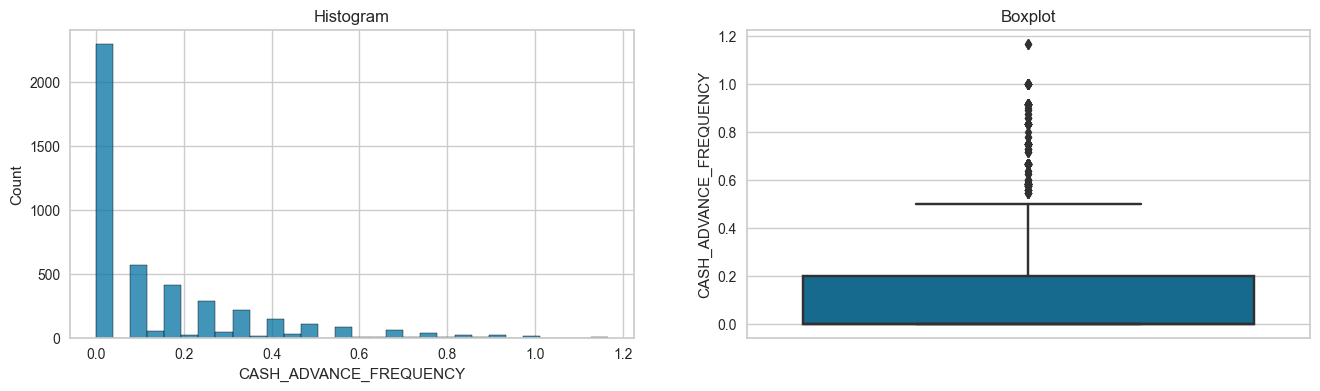

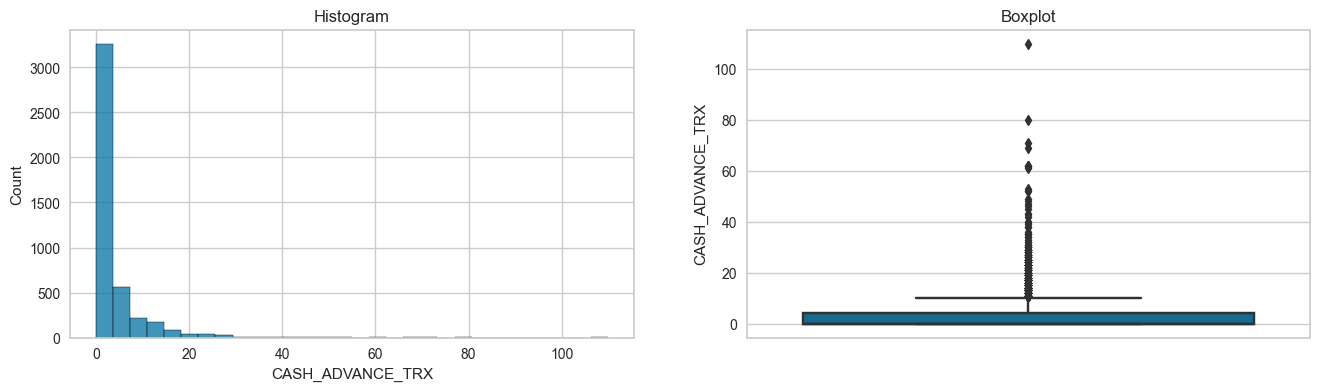

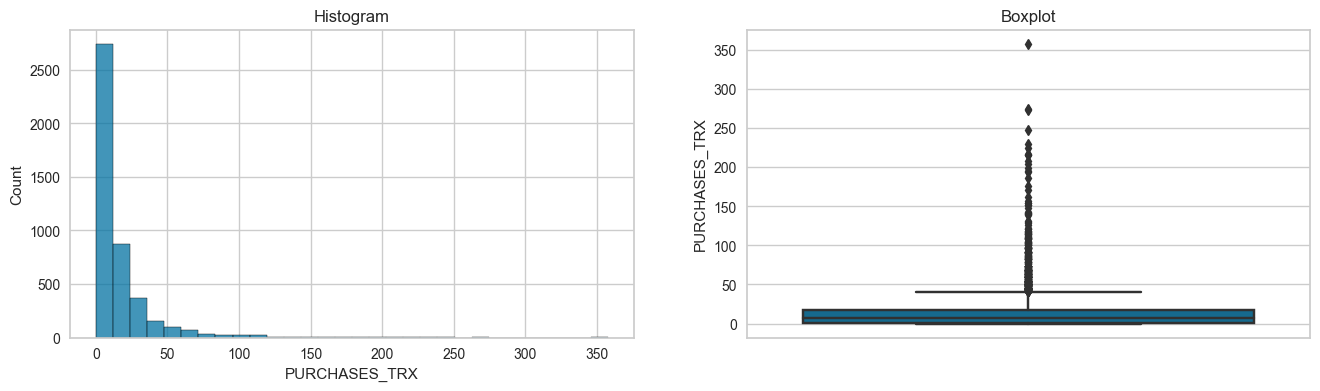

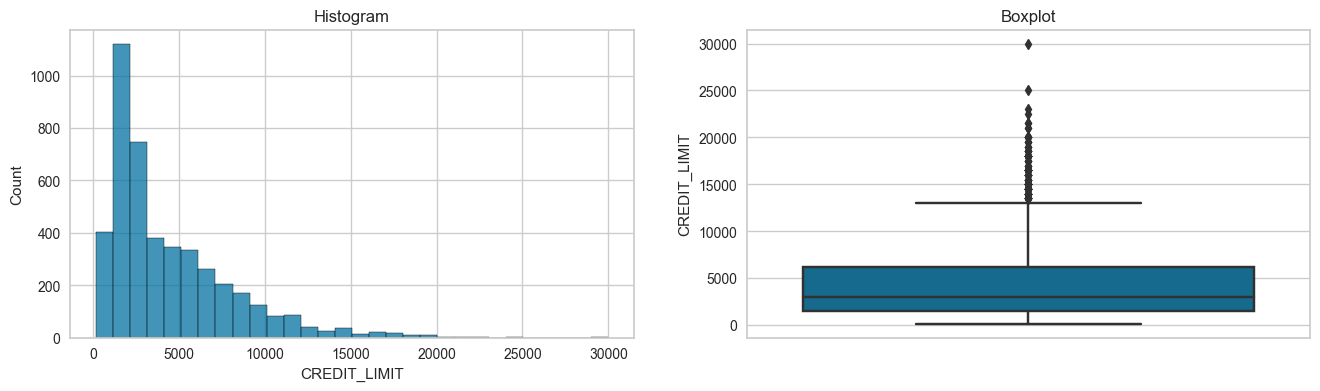

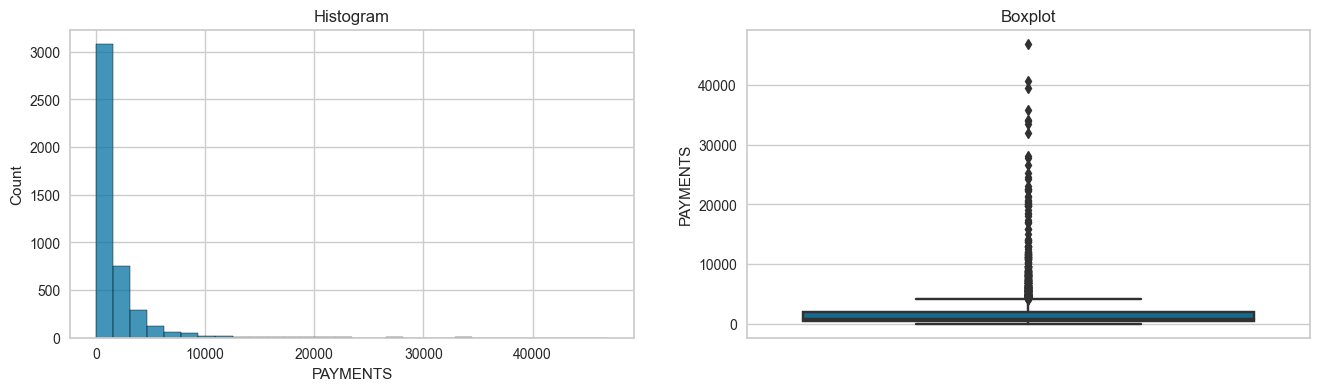

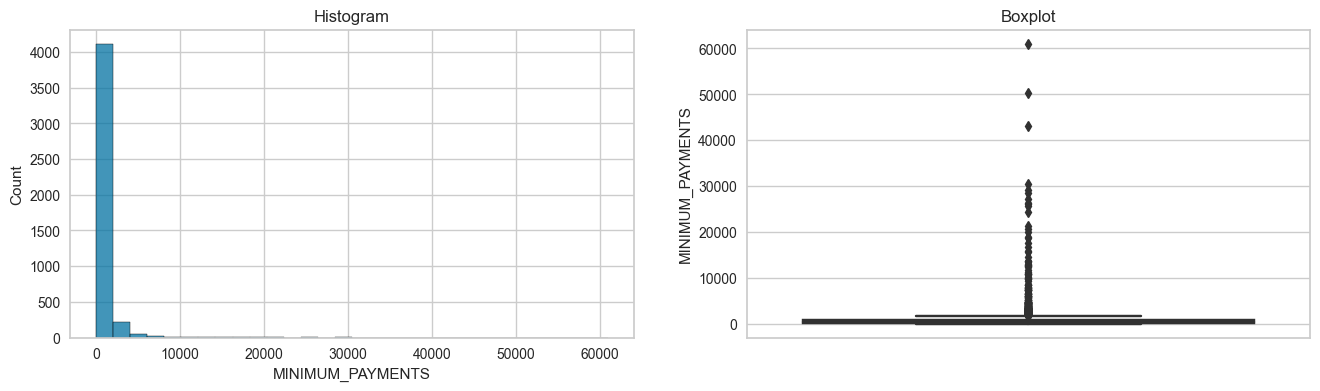

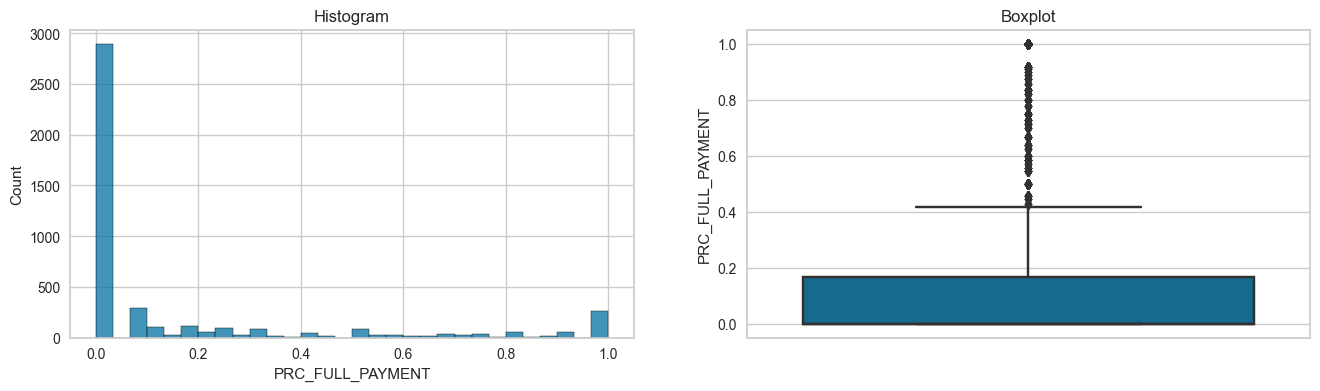

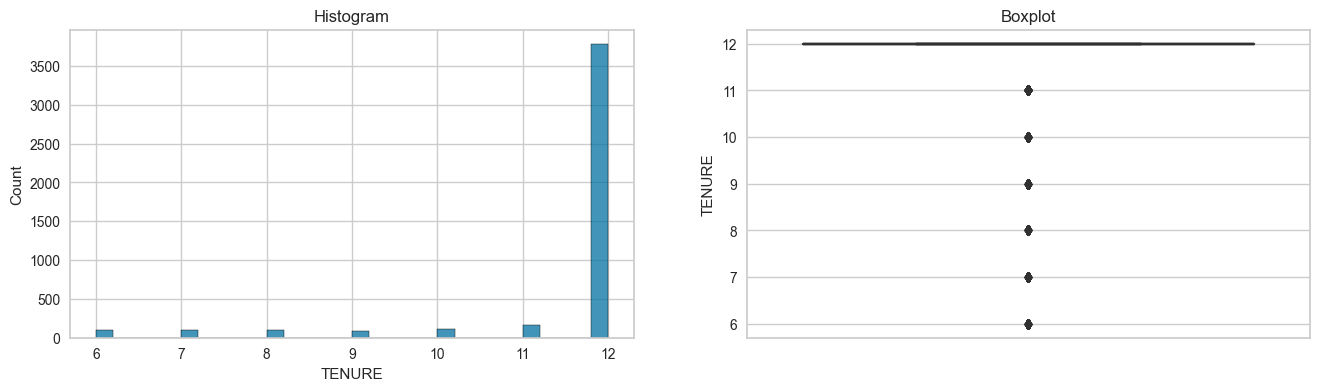


Skewness Value :  BALANCE                              2.449329
BALANCE_FREQUENCY                   -2.037483
PURCHASES                            8.960221
ONEOFF_PURCHASES                    10.108283
INSTALLMENTS_PURCHASES               8.091917
CASH_ADVANCE                         4.723305
PURCHASES_FREQUENCY                  0.060577
ONEOFF_PURCHASES_FREQUENCY           1.514170
PURCHASES_INSTALLMENTS_FREQUENCY     0.511767
CASH_ADVANCE_FREQUENCY               1.813547
CASH_ADVANCE_TRX                     4.737134
PURCHASES_TRX                        4.465352
CREDIT_LIMIT                         1.539254
PAYMENTS                             6.028553
MINIMUM_PAYMENTS                    12.493266
PRC_FULL_PAYMENT                     1.899892
TENURE                              -2.937694
dtype: float64


In [41]:
cols = feature.keys()
for cek in feature[cols]:
    diagnostic_plots(feature, cek)

print('\nSkewness Value : ', feature[cols].skew())

Sebenarnya banyak outlier dalam dataset ini namun saya tidak menganggap data data tersebut sebagai outlier

Missing Values juga sudah di handle di bagian EDA

### Feature Scaling

In [46]:
scaler = MinMaxScaler()
scaler.fit(feature)
scaled = scaler.transform(feature)

### Cek VIF & Cummulative EVR

In [48]:
vif = pd.DataFrame()
vif["feature"] = feature.columns
vif["VIF"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif

,feature,VIF
0,BALANCE,4.100060
1,BALANCE_FREQUENCY,19.978622
2,PURCHASES,63949.638399
3,ONEOFF_PURCHASES,33893.016694
4,INSTALLMENTS_PURCHASES,11199.988659
5,CASH_ADVANCE,3.470773
6,PURCHASES_FREQUENCY,26.435314
7,ONEOFF_PURCHASES_FREQUENCY,5.843777
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.500969
9,CASH_ADVANCE_FREQUENCY,5.162787


Bisa kita lihat value VIF nya ada 8 column yang dibawah 5, bisa kita prediksi bahwa PCA akan mereduksi dimensi dari 17 feature menjadi 9

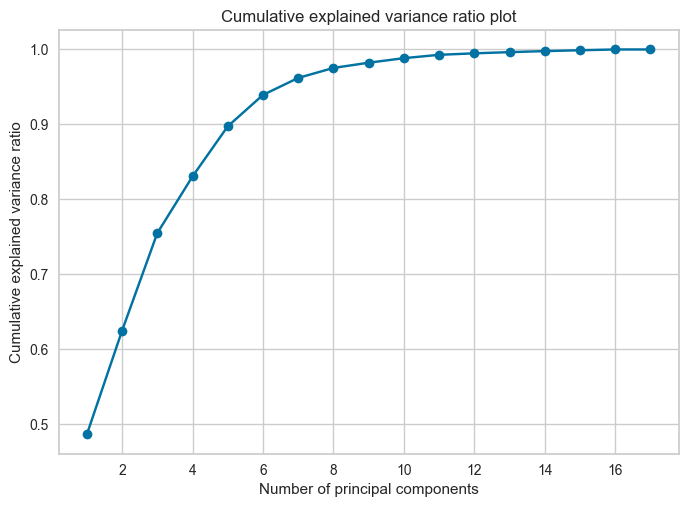

In [49]:
# Create a PCA object and fit the standardized data
pca = PCA()
pca.fit(scaled)

# Calculate the cumulative explained variance ratio
cumulative_evr = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative EVR graph
plt.plot(range(1, len(cumulative_evr)+1), cumulative_evr, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cumulative explained variance ratio plot')
plt.show()

Dari cummulative EVR, kalau kita reduce dari 9 column tampak nya juga masih bagus dengan retain lebih dari 0.9 ratio, saya akan buat 2 PCA yaitu dengan n=9 dan n=0.8 untuk perbandingan

### PCA

In [54]:
pca1 = PCA(9)
pca1.fit(scaled)
transformed_9 = pca1.transform(scaled)


In [55]:
pca2 = PCA(0.8)
pca2.fit(scaled)
transformed_80 = pca2.transform(scaled)


In [79]:
# Membuat hasil PCA ke dalam dataframe
df_9 = pd.DataFrame(transformed_9,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

df_80 = pd.DataFrame(transformed_80,columns=['PC1','PC2','PC3','PC4'])



## 7. Model Definition

### Elbow Method

Akan kita cek elbow method untuk mengetahui berapa cluster yang optimal untuk data yang kita punya

c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

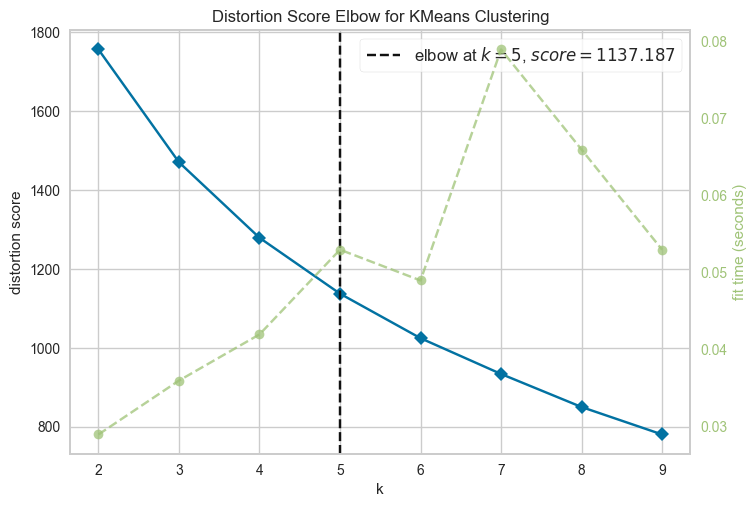

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Elbow untuk data yang 9 dimensi
km = KMeans(random_state=18)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(transformed_9)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SUPERVISOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

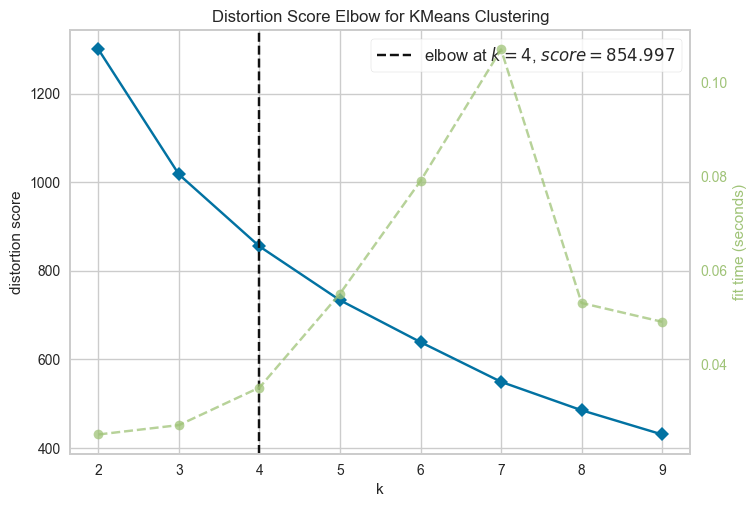

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Elbow untuk data yang 4 dimensi
km = KMeans(random_state=18)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(transformed_80)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Kelihatan nya untuk data yang 9 dimensi akan optimal jika dipisah menjadi 5 cluster, sedangkan data 4 dimensi cukup hanya dengan 4 cluster

### K Means

In [72]:
# Perform k-means clustering on the transformed data
model_1 = KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=300, random_state=18)


In [73]:
# Perform k-means clustering on the transformed data
model_2 = KMeans(n_clusters=4,init='k-means++', n_init=10, max_iter=300, random_state=18)


## 8. Model Training

In [88]:
model_1.fit(transformed_9)

KMeans(n_clusters=5, n_init=10, random_state=18)

In [89]:
model_2.fit(transformed_80)

KMeans(n_clusters=4, n_init=10, random_state=18)

## 9. Model Evaluation

In [80]:
pred_model1 = model_1.predict(transformed_9)
hasil_model1 = df_9.copy()
hasil_model1['clusters']= pred_model1

Text(0.5, 1.0, 'Clustering Result in 2D using PCA, clusters=5')

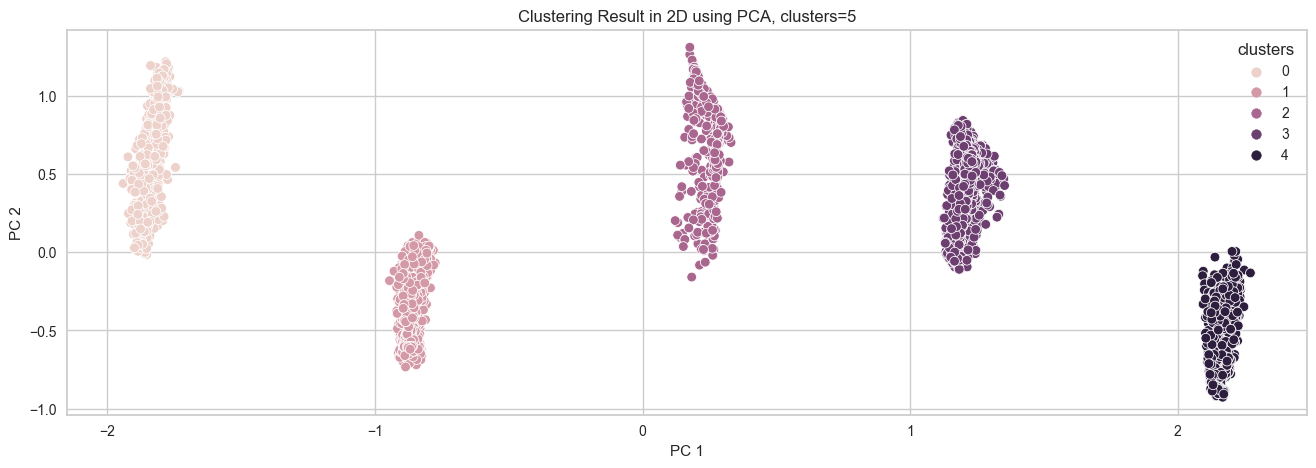

In [82]:
# dimension reduction into 2D using PCA
pca_2d=PCA(n_components=2).fit(hasil_model1)
twod_pca=pca_2d.transform(hasil_model1)

fig,ax=plt.subplots(figsize=(16,5))
sns.scatterplot(x=twod_pca[:,0],y=twod_pca[:,1], hue=hasil_model1['clusters'])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Clustering Result in 2D using PCA, clusters=5')

Dalam model yang ini terlihat model sudah cukup oke juga terpisah masing2 cluster nya, dan tersebar cukup merata

In [83]:
pred_model2 = model_2.predict(transformed_80)
hasil_model2 = df_80.copy()
hasil_model2['clusters']= pred_model2

Text(0.5, 1.0, 'Clustering Result in 2D using PCA, clusters=4')

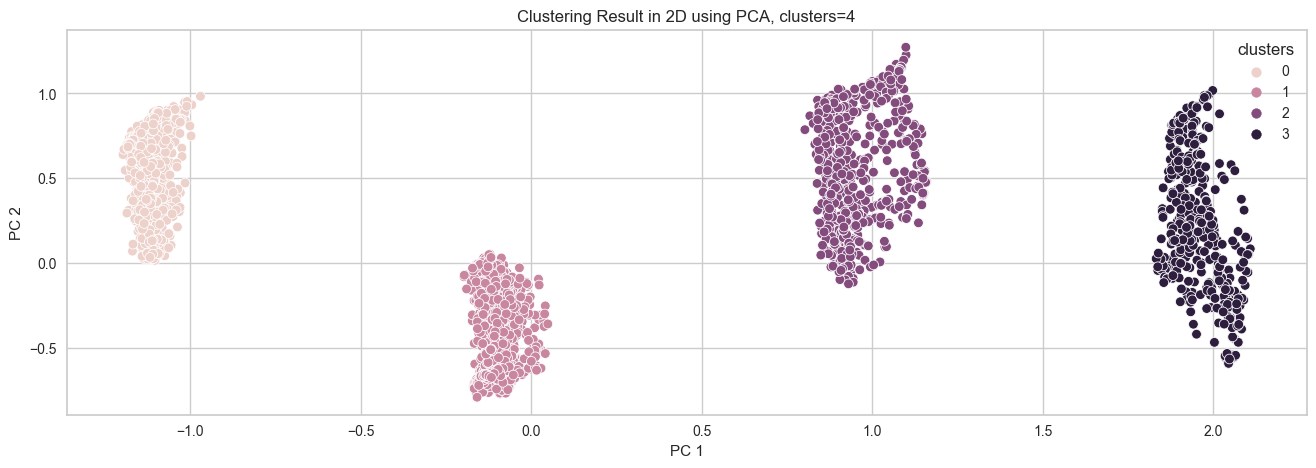

In [85]:
# dimension reduction into 2D using PCA
pca_2d=PCA(n_components=2).fit(hasil_model2)
twod_pca=pca_2d.transform(hasil_model2)

fig,ax=plt.subplots(figsize=(16,5))
sns.scatterplot(x=twod_pca[:,0],y=twod_pca[:,1], hue=hasil_model2['clusters'])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Clustering Result in 2D using PCA, clusters=4')

Menurut saya, model 1 dengan 5 cluster dari 9 feature membentuk clustering yang lebih baik. Terlihat lebih terkelompok dan lebih balance antar setiap clusternya

In [122]:
hasil_model1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,clusters
0,-0.572648,-0.412135,0.121961,0.647568,0.508054,0.122668,0.051162,0.056067,0.030514,4
1,-0.550877,-0.019555,0.033562,0.525092,0.000064,-0.269907,0.127357,0.056137,0.030530,1
2,-0.622097,-0.286107,0.228696,0.659066,0.529363,0.108247,0.035285,0.030402,0.029232,4
3,-0.537784,0.021011,0.005653,0.503439,-0.082804,-0.341239,0.134402,0.068587,0.020229,1
4,-0.536702,0.029921,0.004564,0.501298,-0.089345,-0.323000,0.159599,0.063730,0.034737,1
...,...,...,...,...,...,...,...,...,...,...
4437,-0.667413,0.001784,-0.078154,0.046733,-0.284691,0.024942,-0.181166,0.095964,-0.029360,1
4438,-0.673970,-0.013650,-0.049052,0.057041,-0.239209,0.134407,-0.124247,0.065174,-0.033092,1
4439,0.417747,0.615588,0.049792,0.228631,-0.085655,0.231182,-0.170805,-0.195937,-0.102582,0
4440,-0.242963,0.435473,0.113319,0.132340,-0.236471,0.189455,-0.136777,-0.102547,0.043604,1


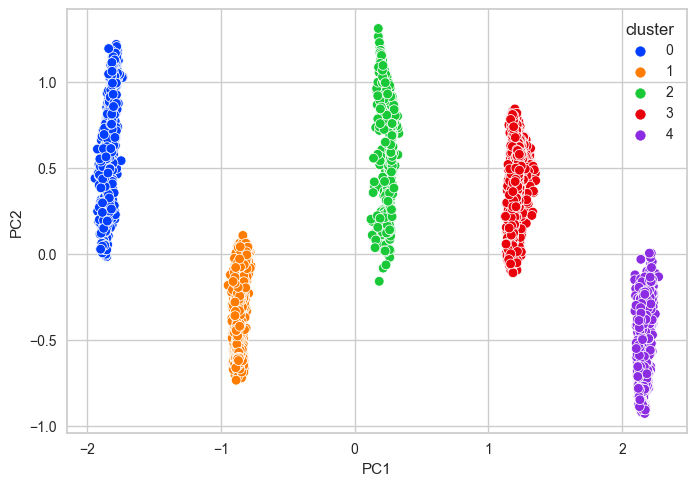

In [127]:
# dimension reduction into 2D using PCA
pca_2d=PCA(n_components=2).fit(hasil_model1)
twod_pca=pca_2d.transform(hasil_model1)
# Membuat hasil PCA ke dalam dataframe
final_df = pd.DataFrame(twod_pca,columns=['PC1','PC2'])
final_df['cluster'] = pred_model1
sns.scatterplot(data = final_df, x='PC1', y='PC2', hue='cluster', palette='bright')
plt.show()

### EDA

In [93]:
data['clusters'] = pred_model1
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,0.000000,0.000000,8,4
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,0.000000,0.000000,8,4
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,1
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,0
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,1


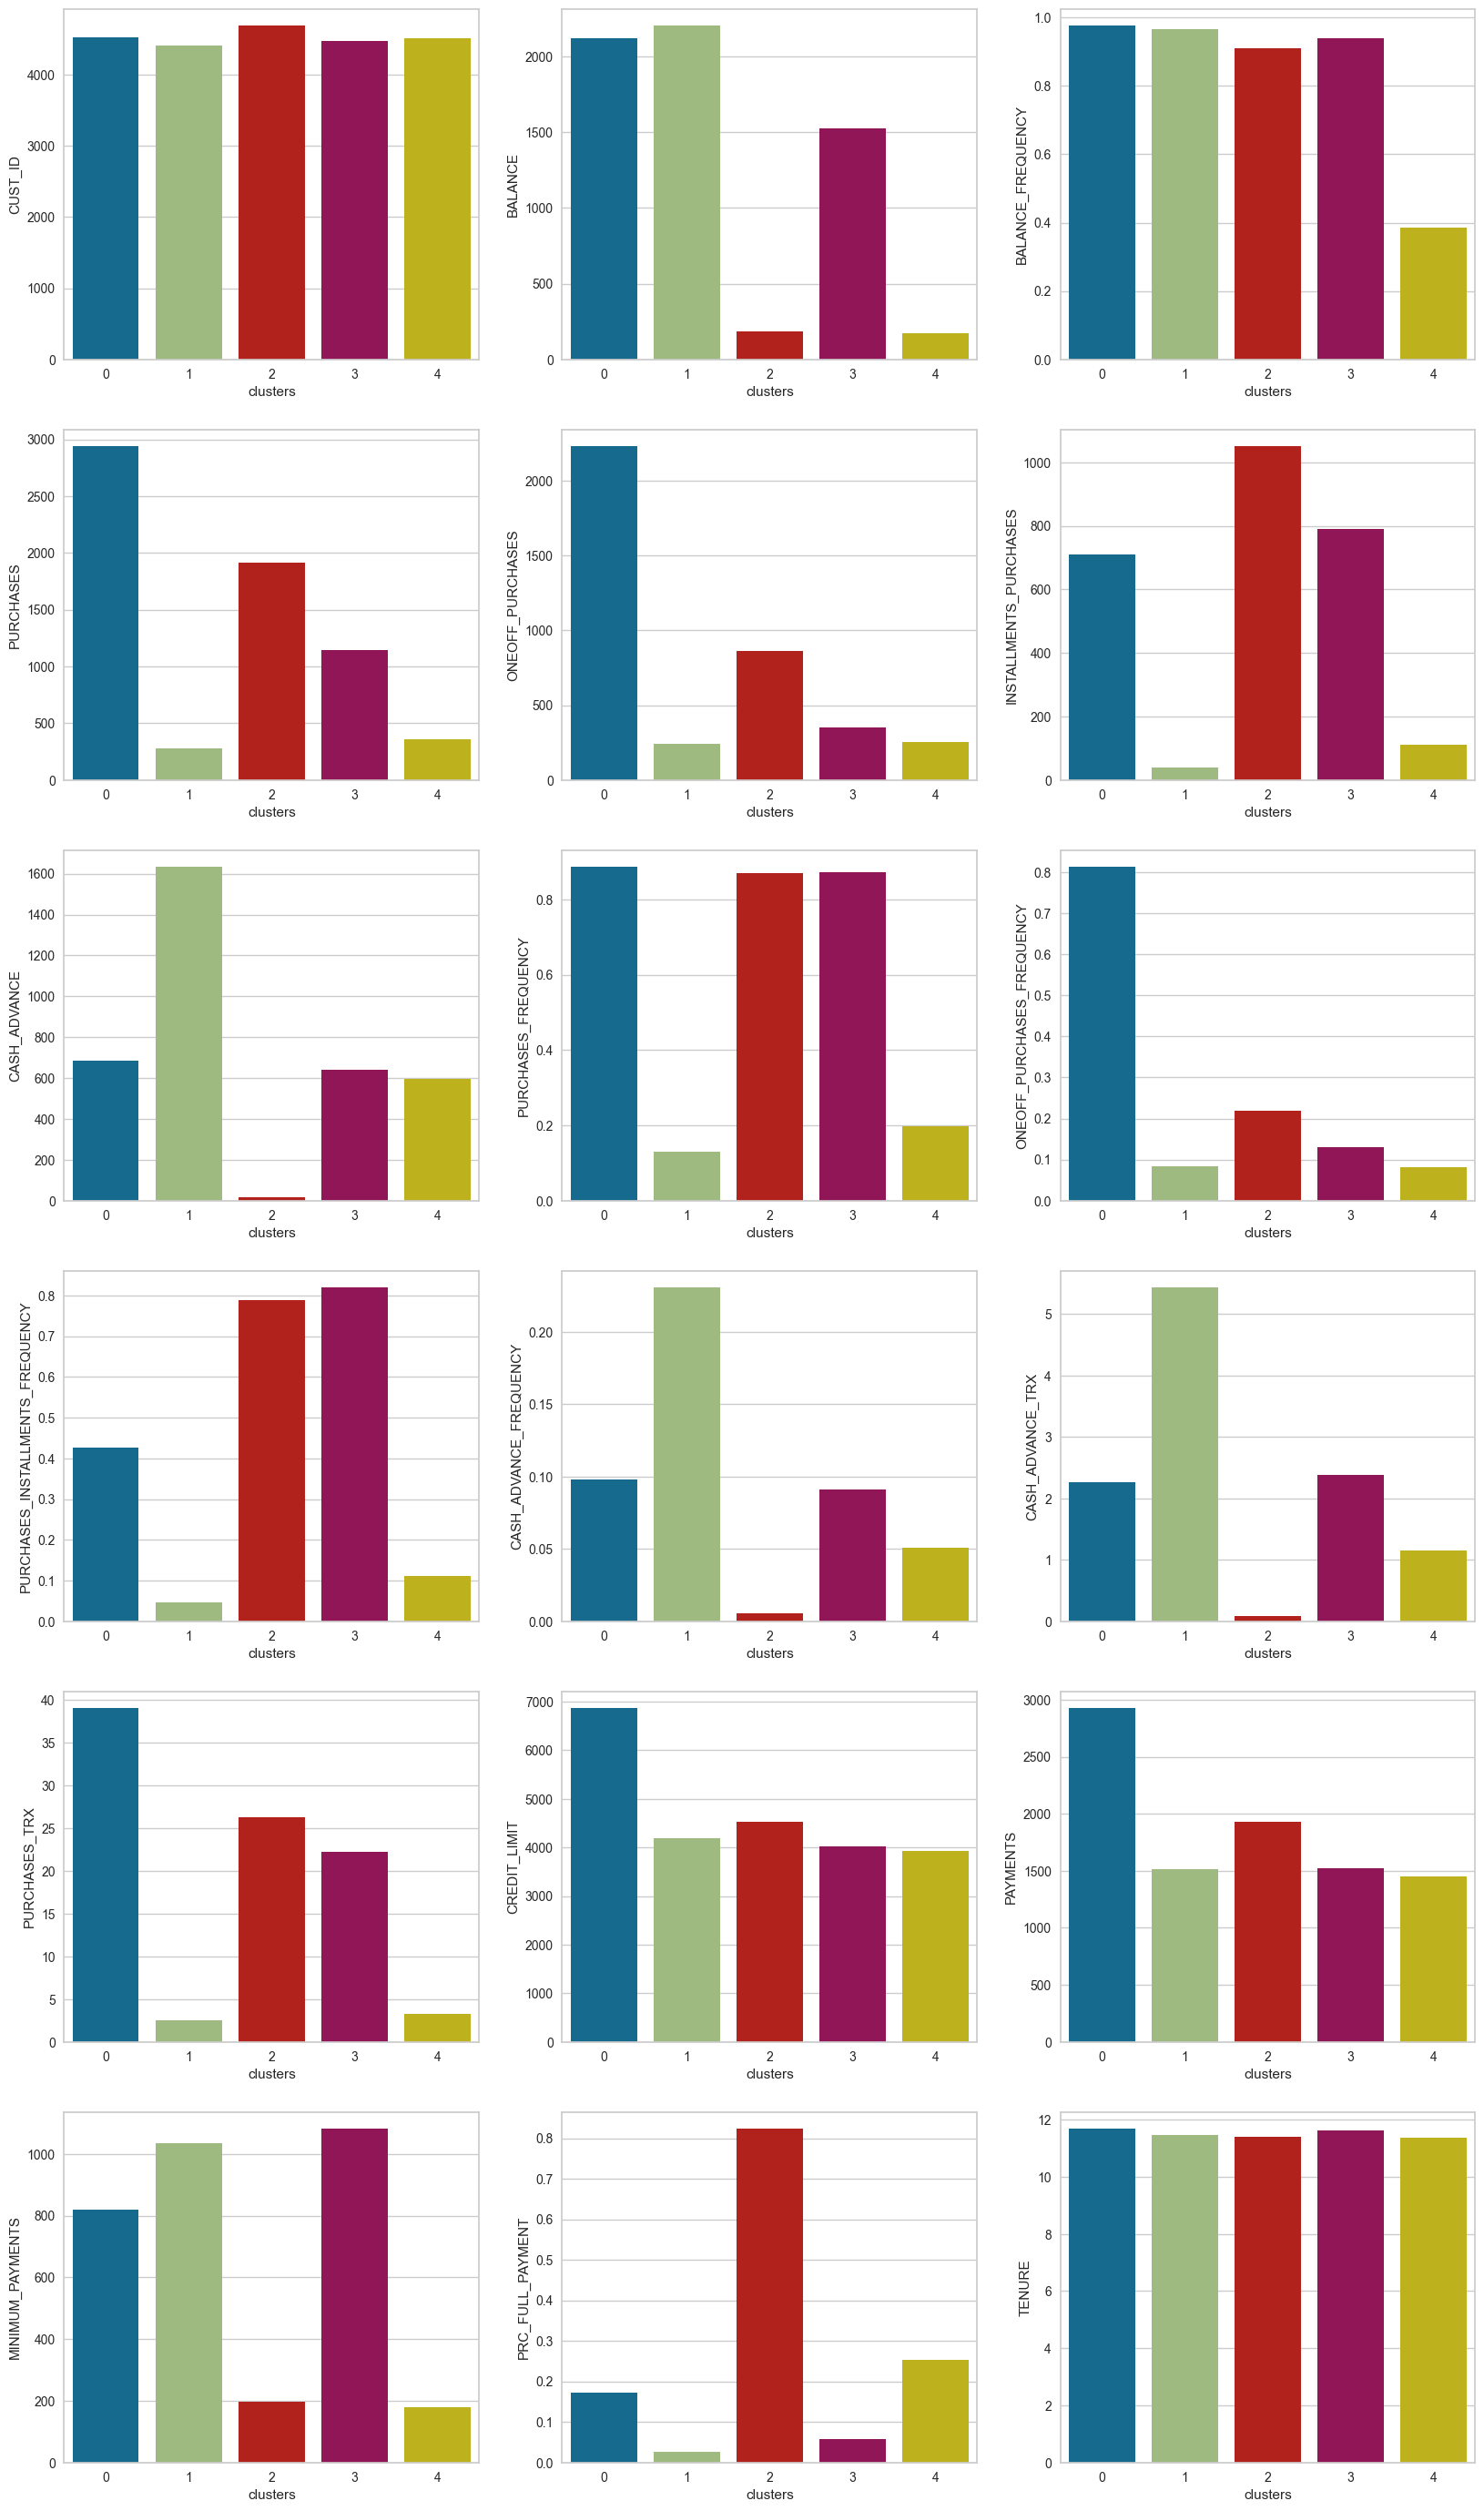

In [97]:
# Barplot dari masing-masing feature terhadap cluster
plt.figure(figsize=(20,35))
for i,col in enumerate (data.columns[:-1]):
    ax = plt.subplot(6, 3, i+1)
    sns.barplot(data=data.iloc[:,:-1], x=data.clusters, y=col,errorbar=None)

Ciri - ciri user berdasarkan cluster:
- Cluster 0 adalah user credit card dengan limit yang tinggi, spent a lot most of it in one go (sekali transaksi langsung mahal). Biasanya mereka juga berbelanda in one bulk (high one off purchase frequency)
- Cluster 1 adalah user yang suka menggunakan credit card tapi dengan Cash In Advance payment method
- Cluster 2 adalah user yang suka ber transaksi dengan cicilan, namun sudah melunaskan kebanyakan tagihan dalam 6 bulan terakhir
- Cluster 3 adalah user yang suka ber transaksi dengan cicilan, dan belum menyelesaikan tagihan dalam 6 bulan terakhir
- Cluster 4 adalah user yang paling jarang menggunakan credit card untuk ber transaki of any kind

## 10. Model Saving

In [100]:
# Save the Files

with open('model.pkl', 'wb') as file_1:
    pickle.dump(model_1, file_1)
    
with open('pca.pkl', 'wb') as file_3:
    pickle.dump(pca1, file_3)
    
with open('scaler.pkl', 'wb') as file_5:
    pickle.dump(scaler, file_5)

## 11. Model Inference

In [101]:
# Load All Files

with open('model.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  model_scaler = pickle.load(file_2)

with open('pca.pkl','rb') as file_3:
  model_pca = pickle.load(file_3)

In [120]:
# Create New Data

data_inf = {
    'CUST_ID': 1905,
    'BALANCE': 382,
    'BALANCE_FREQUENCY': 0.5,
    'PURCHASES': 325.0,
    'ONEOFF_PURCHASES': 325.0,
    'INSTALLMENTS_PURCHASES': 0.0,
    'CASH_ADVANCE': 0.0,
    'PURCHASES_FREQUENCY': 0.125,
    'ONEOFF_PURCHASES_FREQUENCY': 0.0,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
    'CASH_ADVANCE_FREQUENCY': 0.0,
    'CASH_ADVANCE_TRX': 0.0,
    'PURCHASES_TRX': 1,
    'CREDIT_LIMIT': 707,
    'PAYMENTS': 0.0,
    'MINIMUM_PAYMENTS': 0.0,
    'PRC_FULL_PAYMENT': 0.0,
    'TENURE': 6
}

data_inf = pd.DataFrame([data_inf])
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1905,382,0.5,325.0,325.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,1,707,0.0,0.0,0.0,6


In [121]:

data_inf = data_inf.drop(['CUST_ID'], axis=1)

# Feature Scaling

data_inf_scaled = model_scaler.transform(data_inf)

# PCA

data_inf_final = model_pca.transform(data_inf_scaled)

# Predict using Model

y_pred_inf = model.predict(data_inf_final)
y_pred_inf

array([4])

Berdasarkan hasil prediksi model clustering ini, data user yang saya masukan termasuk ke dalam cluster 4 yang berarti orang yang tidak suka menggunakan credit card untuk bertransaksi

## 12. Conclusion

Kesimpulan dari pembuatan model ini adalah:
1. Banyak feature dalam data credit card saling berkorelasi satu dengan yang lain
2. Dari hasil clustering model, bisa kita lihat berbagai jenis user dan bisa kita buat keputusan apa yang bisa kita lakukan kepada user terkait. Contoh nya untuk orang di cluster 4 mungkin kita bisa fokuskan untuk buat promosi yang menarik agar user lebih banyak menggunakan kartu kredit untuk ber transaksi. Atau misalnya kita bisa keep track user yang ada di cluster 3 yang belum menyelesaikan pembayaran cicilan nya

### Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia adalah ukuran yang digunakan untuk mengevaluasi kualitas clustering. Inertia mengukur jarak antara setiap titik sample dalam sebuah cluster terhadap entroid dari cluster

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method adalah metode untuk mencari berapa jumlah cluster yang optimal

Cara Penggunaan nya dengan mengeluarkan grafik elbow visualizer dan tentukan titik elbow nya mana yang paling signifikan bentuk patahannya

Kelebihan:

- Dapat memberikan jumlah cluster yang optimal
- Dapat memberikan hasil yang cepat.
- Mudah dipahami dan diinterpretasikan oleh orang awam

Kelemahan:

- Sangat Subjective, setiap orang memiliki interpretasi yang berbeda saat melihat grafik Elbow Method.